In [1]:
import numpy as np
from sympy import *
from matplotlib import pyplot as plt

# 1D Beam Solution

In [2]:
bc = 1  # constrain (or Boundary condition) at node 1
E = 70000   # Youngs Modulus
I = 300*40**3/12  # Area Moment of Inertia 
L = 1500  # Length of Bar
F = 4000   # Force at the tip of Bar
numElem = 30  # Number of Elements

In [3]:
le = L/numElem

elem = []
for i in range(numElem):
    elem.append([i+1,i+2])
elem

[[1, 2],
 [2, 3],
 [3, 4],
 [4, 5],
 [5, 6],
 [6, 7],
 [7, 8],
 [8, 9],
 [9, 10],
 [10, 11],
 [11, 12],
 [12, 13],
 [13, 14],
 [14, 15],
 [15, 16],
 [16, 17],
 [17, 18],
 [18, 19],
 [19, 20],
 [20, 21],
 [21, 22],
 [22, 23],
 [23, 24],
 [24, 25],
 [25, 26],
 [26, 27],
 [27, 28],
 [28, 29],
 [29, 30],
 [30, 31]]

In [4]:
x = Symbol('x')
Le = Symbol('Le')

# Shape Function Matrix
shape = np.matrix([
    (2*(x/le)**3 - 3*(x/le)**2 + 1),
    ((x/le)**3 - 2*(x/le)**2 + (x/le))*le,
    (-2*(x/le)**3 + 3*(x/le)**2),
    ((x/le)**3 - (x/le)**2)*le
])

# Differentiated Shape Function Matrix
shape_d = []
for i in range(shape.shape[1]):
    shape_d.append(diff(diff(np.array(shape[0, i]).flatten()[0], x), x))

shape = np.matrix(shape)
shape_d = np.matrix(shape_d)

shape, shape_d

(matrix([[1.59045414512598e-5*x**3 - 0.00119522231392681*x**2 + 1,
          0.000398407437975605*x**3 - 0.0399202924826763*x**2 + 1.0*x,
          -1.59045414512598e-5*x**3 + 0.00119522231392681*x**2,
          0.000398407437975605*x**3 - 0.0199601462413381*x**2]],
        dtype=object),
 matrix([[9.54272487075591e-5*x - 0.00239044462785363,
          0.00239044462785363*x - 0.0798405849653525,
          0.00239044462785363 - 9.54272487075591e-5*x,
          0.00239044462785363*x - 0.0399202924826763]], dtype=object))

In [5]:
# Creating The Local Stiffness Matrix

k = np.matmul(shape_d.T, shape_d)
for i in range(k.shape[0]):
    for j in range(k.shape[1]):
        k[i,j] = simplify(integrate(k[i,j], x).subs(x, Le))
k

matrix([[Le*(3.03545326529811e-9*Le**2 - 2.28113554023837e-7*Le + 5.71422551883427e-6),
         Le*(7.60378513412789e-8*Le**2 - 6.66659643863998e-6*Le + 0.000190854497415118),
         Le*(-3.03545326529811e-9*Le**2 + 2.28113554023837e-7*Le - 5.71422551883427e-6),
         Le*(7.60378513412789e-8*Le**2 - 4.76185459902856e-6*Le + 9.54272487075591e-5)],
        [Le*(7.60378513412789e-8*Le**2 - 6.66659643863998e-6*Le + 0.000190854497415118),
         Le*(1.90474183961142e-6*Le**2 - 0.000190854497415118*Le + 0.00637451900760968),
         Le*(-7.60378513412789e-8*Le**2 + 6.66659643863998e-6*Le - 0.000190854497415118),
         Le*(1.90474183961142e-6*Le**2 - 0.000143140873061339*Le + 0.00318725950380484)],
        [Le*(-3.03545326529811e-9*Le**2 + 2.28113554023837e-7*Le - 5.71422551883427e-6),
         Le*(-7.60378513412789e-8*Le**2 + 6.66659643863998e-6*Le - 0.000190854497415118),
         Le*(3.03545326529811e-9*Le**2 - 2.28113554023837e-7*Le + 5.71422551883427e-6),
         Le*(-7.6037

In [6]:
K = np.zeros([2*len(elem)+2, 2*len(elem)+2])  # Creating initially zero matrix for global stiffness matrix

for i in elem:
    temp = k.copy()
    for a in range(temp.shape[0]):
        for j in range(temp.shape[1]):
            temp[a,j] = temp[a,j].subs(Le, le)
    K[2*i[0]-2:2*i[1], 2*i[0]-2:2*i[1]] = K[2*i[0]-2:2*i[1], 2*i[0]-2:2*i[1]] +  (E*I) * temp

In [7]:
def BC(K, bc):
    newK = []
    for i in range(len(K)):
        temp = []
        for j in range(len(K[0])):
            if not(i==bc or j==bc or i==bc+1 or j==bc+1):
                temp.append(K[i][j])
        if temp != []:
            newK.append(temp)
    if newK != []:
        return np.matrix(newK)
    else:
        return np.matrix(K)

In [8]:
# Global Stiffness Matrix After Applying Boundary Conditions
Kc = BC(K, bc-1)

In [9]:
# Creating Force Vector
f = np.zeros([len(Kc), 1])
f[-2] = F
f

array([[   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [3955.],
       [   0.]])

In [10]:
# Obtaining the Nodal Displacement Vector
u = np.linalg.solve(Kc, f)
u = list(u)
u.insert(0, [0])
u.insert(0, [0])
u = np.matrix(u)
u

matrix([[0.00000000e+00],
        [0.00000000e+00],
        [4.35407479e-02],
        [1.72839445e-03],
        [1.72206104e-01],
        [3.39819926e-03],
        [3.83060737e-01],
        [5.00941443e-03],
        [6.73169316e-01],
        [6.56203995e-03],
        [1.03959651e+00],
        [8.05607583e-03],
        [1.47940699e+00],
        [9.49152207e-03],
        [1.98966541e+00],
        [1.08683787e-02],
        [2.56743646e+00],
        [1.21866456e-02],
        [3.20978480e+00],
        [1.34463229e-02],
        [3.91377509e+00],
        [1.46474106e-02],
        [4.67647201e+00],
        [1.57899086e-02],
        [5.49494023e+00],
        [1.68738170e-02],
        [6.36624441e+00],
        [1.78991358e-02],
        [7.28744922e+00],
        [1.88658649e-02],
        [8.25561934e+00],
        [1.97740043e-02],
        [9.26781942e+00],
        [2.06235541e-02],
        [1.03211141e+01],
        [2.14145143e-02],
        [1.14125682e+01],
        [2.21468848e-02],
        [1.2

In [11]:
# Obtaining the Full force Vector including the Reaction Force
Force = np.matmul(K, u)
Force

matrix([[-3.95500000e+03],
        [-5.94434523e+06],
        [ 9.31322575e-10],
        [-1.49011612e-08],
        [ 3.25962901e-09],
        [ 0.00000000e+00],
        [ 8.84756446e-09],
        [ 0.00000000e+00],
        [-4.65661287e-10],
        [ 0.00000000e+00],
        [-8.38190317e-09],
        [ 5.96046448e-08],
        [-1.62981451e-09],
        [-5.96046448e-08],
        [-1.30385160e-08],
        [-5.96046448e-08],
        [ 3.45753506e-08],
        [ 0.00000000e+00],
        [ 2.21189111e-09],
        [ 2.38418579e-07],
        [ 3.94647941e-08],
        [ 0.00000000e+00],
        [-1.71130523e-08],
        [ 2.38418579e-07],
        [ 3.10828909e-08],
        [-2.38418579e-07],
        [ 1.33877620e-08],
        [-1.19209290e-07],
        [-8.21892172e-08],
        [ 5.96046448e-07],
        [ 6.21657819e-08],
        [-1.19209290e-07],
        [ 9.66247171e-09],
        [ 4.76837158e-07],
        [ 5.79748303e-08],
        [ 0.00000000e+00],
        [ 6.44940883e-08],
 

In [12]:
# Calculation the Strains using the nodal displacement vector
strain = []
for i in elem:
    temp = []
    for a in range(shape_d.size):
        temp.append(shape_d[0,a].subs(x, Le).subs(Le, le))
    temp = np.matrix(temp)   
    strain.append(np.matmul(temp, u[2*i[0]-2:2*i[1], 0]))
strain

[matrix([[3.39142770919548e-5]], dtype=object),
 matrix([[3.27448192611560e-5]], dtype=object),
 matrix([[3.15753614303579e-5]], dtype=object),
 matrix([[3.04059035995630e-5]], dtype=object),
 matrix([[2.92364457687683e-5]], dtype=object),
 matrix([[2.80669879379698e-5]], dtype=object),
 matrix([[2.68975301071705e-5]], dtype=object),
 matrix([[2.57280722763661e-5]], dtype=object),
 matrix([[2.45586144455717e-5]], dtype=object),
 matrix([[2.33891566147762e-5]], dtype=object),
 matrix([[2.22196987839974e-5]], dtype=object),
 matrix([[2.10502409532108e-5]], dtype=object),
 matrix([[1.98807831224394e-5]], dtype=object),
 matrix([[1.87113252916697e-5]], dtype=object),
 matrix([[1.75418674608710e-5]], dtype=object),
 matrix([[1.63724096300924e-5]], dtype=object),
 matrix([[1.52029517993071e-5]], dtype=object),
 matrix([[1.40334939685465e-5]], dtype=object),
 matrix([[1.28640361378013e-5]], dtype=object),
 matrix([[1.16945783070323e-5]], dtype=object),
 matrix([[1.05251204762953e-5]], dtype=o

In [13]:
# Calculation Stress
y = 45.37/2
stress = E * np.array(strain) * y
stress

array([[[54.6358312100139]],

       [[52.7518370302910]],

       [[50.8678428505693]],

       [[48.9838486708526]],

       [[47.0998544911364]],

       [[45.2158603114140]],

       [[43.3318661316903]],

       [[41.4478719519584]],

       [[39.5638777722426]],

       [[37.6798835925250]],

       [[35.7958894128343]],

       [[33.9118952331311]],

       [[32.0279010534523]],

       [[30.1439068737763]],

       [[28.2599126940535]],

       [[26.3759185143632]],

       [[24.4919243346620]],

       [[22.6079301550007]],

       [[20.7239359753642]],

       [[18.8399417956893]],

       [[16.9559476160660]],

       [[15.0719534363998]],

       [[13.1879592568345]],

       [[11.3039650772455]],

       [[9.41997089768237]],

       [[7.53597671815064]],

       [[5.65198253856932]],

       [[3.76798835901524]],

       [[1.88399417952264]],

       [[-1.32745209095730e-11]]], dtype=object)

In [14]:
a = le
u_act = (F*L**3/(3*E*I))
# u_act = (F/(6*E*I))*a**2*(3*L-a)

print('Hand Caluclation for Tip Deflection:', u_act)
print('FEM Tip Deflection:', u[-2,0])
print('% Error:', (u_act-u[-2,0])*100/u_act)

Hand Caluclation for Tip Deflection: 26.417981876340257
FEM Tip Deflection: 26.417981878465586
% Error: -8.045009856832463e-09


In [15]:
a = le
y = 45.37/2
stress_act = (F*L*y/I)
# stress_act = (F/(6*E*I))*a**2*(3*L-a)

print('Hand Caluclation for Tip Deflection:', stress_act)
print('FEM Tip Deflection:', stress[1,0])
print('% Error:', (stress_act-stress[1,0])*100/stress_act)

Hand Caluclation for Tip Deflection: 56.51982538443447
FEM Tip Deflection: [52.7518370302910]
% Error: [6.66666665814085]


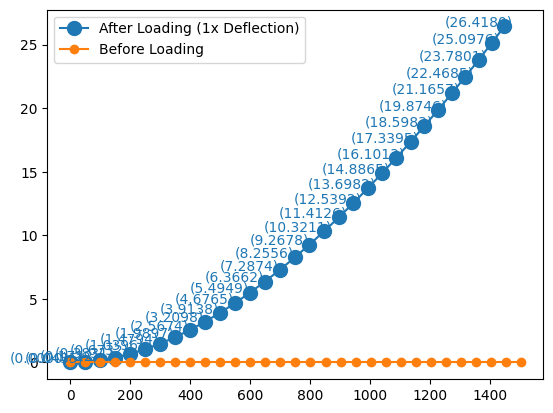

In [16]:
Multiplier = 1

uu = []
for i in range(1, len(u)+1):
    if i%2!=0:
        uu.append([u[i-1, 0]])
uu = np.matrix(uu)
        
x1 = [[0]]
te = 0
for i in range(len(uu)-1):
    te = te + le
    x1.append([te])
x1 = np.matrix(x1)

x = [[0]]
te = 0
for i in range(len(uu)-1):
    te = te + ((le)**2 - (uu[i+1,0]*Multiplier)**2)**0.5
    x.append([te])
x = np.matrix(x)

y = [[0]]
te = 0
for i in range(len(uu)-1):
    te = uu[i+1,0]*Multiplier
    y.append([te])
y = np.matrix(y)


plt.plot(x, y, marker='o', color='tab:blue', markersize=10, label=f'After Loading ({Multiplier}x Deflection)')
ind = 0
for i in zip(x,y):
    plt.annotate('(%.4f)'% (uu[ind,0]), xy=i, xytext=(x[ind]-200,y[ind]+0.0005), color='tab:blue')
    ind = ind+1

plt.plot(x1, np.zeros([x1.size,1]), marker='o', color='tab:orange', label='Before Loading')
plt.legend()